# Tensorflow with Estimators

In general to use the **Estimator** api we take the following steps:
* Define a list of feature columns
* Create the estimator model
* Create a data input function
* Call, train, evaluate and predict methods on the estimator object. Note that the `train`, `evaluate` and `predict` methods are already present in the estimator object and all we need to do is to call these objects 

In [1]:
import tensorflow as tf

In [2]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])] # note that here we are going to use one feature, x is the key
# here

In [3]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols) # here note that we are creating a linear regressor estimator
# a linear regressor estimator 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_save_checkpoints_steps': None, '_task_type': 'worker', '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002F17210FA58>, '_session_config': None, '_num_worker_replicas': 1, '_global_id_in_cluster': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_task_id': 0, '_num_ps_replicas': 0, '_tf_random_seed': None, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\Rajdeep\\AppData\\Local\\Temp\\tmpszzsgyqj', '_master': '', '_service': None}


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import numpy as np

In [6]:
x_data = np.linspace(0.0,10.0,1000000)

In [7]:
noise = np.random.randn(len(x_data))

In [8]:
y_true =  (0.5 * x_data ) + 5 + noise

In [9]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [10]:
# the input function actually acts like the feed_dict with the batch size all at once.

In [11]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                y_train, 
                                                batch_size=8, 
                                               num_epochs=None,
                                               shuffle=True)

In [12]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                y_train, 
                                                batch_size=8, 
                                               num_epochs=1000,
                                               shuffle=False)

In [13]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},
                                                y_eval, 
                                                batch_size=8, 
                                               num_epochs=1000,
                                               shuffle=False)

In [14]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rajdeep\AppData\Local\Temp\tmpszzsgyqj\model.ckpt.
INFO:tensorflow:loss = 477.50632, step = 1
INFO:tensorflow:global_step/sec: 498.2
INFO:tensorflow:loss = 24.994759, step = 101 (0.203 sec)
INFO:tensorflow:global_step/sec: 284.694
INFO:tensorflow:loss = 28.606602, step = 201 (0.342 sec)
INFO:tensorflow:global_step/sec: 686.807
INFO:tensorflow:loss = 16.096388, step = 301 (0.145 sec)
INFO:tensorflow:global_step/sec: 808.912
INFO:tensorflow:loss = 12.765671, step = 401 (0.127 sec)
INFO:tensorflow:global_step/sec: 418.988
INFO:tensorflow:loss = 13.272749, step = 501 (0.237 sec)
INFO:tensorflow:global_step/sec: 708.721
INFO:tensorflow:loss = 21.963024, step = 601 (0.141 sec)
INFO:tensorflow:global_step/

### Evaluation of training data

In [15]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000) # note that here we are using the train_input_func as 
# the input function here and it has a shuffle set to False. This is essential as we would not like to evaluate on a shuffled 
# data. It is essential that the data be in order

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-05:49:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmpszzsgyqj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-23-05:49:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.056789, global_step = 1000, loss = 8.454312


### Evaluation of test data

In [16]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-23-05:49:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmpszzsgyqj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-23-05:49:59
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0813422, global_step = 1000, loss = 8.650738


In [17]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.056789, 'loss': 8.454312, 'global_step': 1000}


In [18]:
print("EVAL METRICS")
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0813422, 'loss': 8.650738, 'global_step': 1000}


In [19]:
# one important indicator of over-fitting for instance is to check if we are getting a low loss on the training data 
# but a high loss on the test data

### Prediction

In [22]:
brand_new_data = np.linspace(0,10,10)

In [23]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [25]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmpszzsgyqj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4551544], dtype=float32)},
 {'predictions': array([5.1200547], dtype=float32)},
 {'predictions': array([5.784955], dtype=float32)},
 {'predictions': array([6.449856], dtype=float32)},
 {'predictions': array([7.114756], dtype=float32)},
 {'predictions': array([7.7796564], dtype=float32)},
 {'predictions': array([8.444557], dtype=float32)},
 {'predictions': array([9.109457], dtype=float32)},
 {'predictions': array([9.774358], dtype=float32)},
 {'predictions': array([10.439259], dtype=float32)}]

In [28]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions']) # 'predictions' is the key

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rajdeep\AppData\Local\Temp\tmpszzsgyqj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
predictions

[array([4.4551544], dtype=float32),
 array([5.1200547], dtype=float32),
 array([5.784955], dtype=float32),
 array([6.449856], dtype=float32),
 array([7.114756], dtype=float32),
 array([7.7796564], dtype=float32),
 array([8.444557], dtype=float32),
 array([9.109457], dtype=float32),
 array([9.774358], dtype=float32),
 array([10.439259], dtype=float32)]

In [33]:
import pandas as pd

In [39]:
x_df = pd.DataFrame(x_data, columns=['X Data'])

In [40]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [42]:
my_data = pd.concat([x_df, y_df], axis=1)

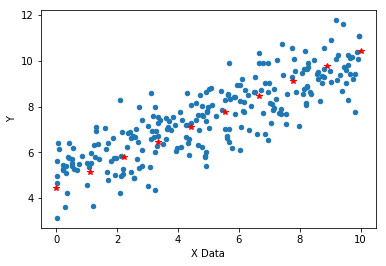

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')